In [1]:
# importando as bibliotecas
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_diabetes

In [5]:
# Carregando a base
db = load_diabetes()
X = db.data
y = db.target
X.shape


(442, 10)

In [9]:
# Uso do GridSearch para buscar o melhor modelo
from sklearn.model_selection import GridSearchCV, train_test_split

parameters = [{'max_depth': [3,5,10],
               'min_samples_split': [3,5,10],
               'criterion': ['absolute_error', 'squared_error'],
               'splitter': ['best', 'random'],
               'random_state': [10, 42]}]

model = DecisionTreeRegressor()

# criando base de validação
X,X_val,y,y_val=train_test_split(X,y,test_size=0.2,random_state=42 )

# Executando GridSeachCV
gs=GridSearchCV(model, parameters, scoring='r2',cv=5,n_jobs=-1)
gs.fit(X_val, y_val)
model=gs.best_estimator_

# Executando a validação cruzada
result=model_selection.cross_val_score(model, X, y, cv=5)
print('R2 médio: %.3f' % result.mean())
print('R2 std: %.3f' % result.std())

# Pegando a saída do modelo
y_pred=model_selection.cross_val_predict(model, X, y, cv=5)

# Erro médio absoluto
mae=mean_absolute_error(y, y_pred)
print('Mean absolute error (mae): %.3f' % mae)


R2 médio: 0.203
R2 std: 0.088
Mean absolute error (mae): 57.204


{'criterion': 'squared_error', 'max_depth': 3, 'min_samples_split': 3, 'random_state': 10, 'splitter': 'random'}


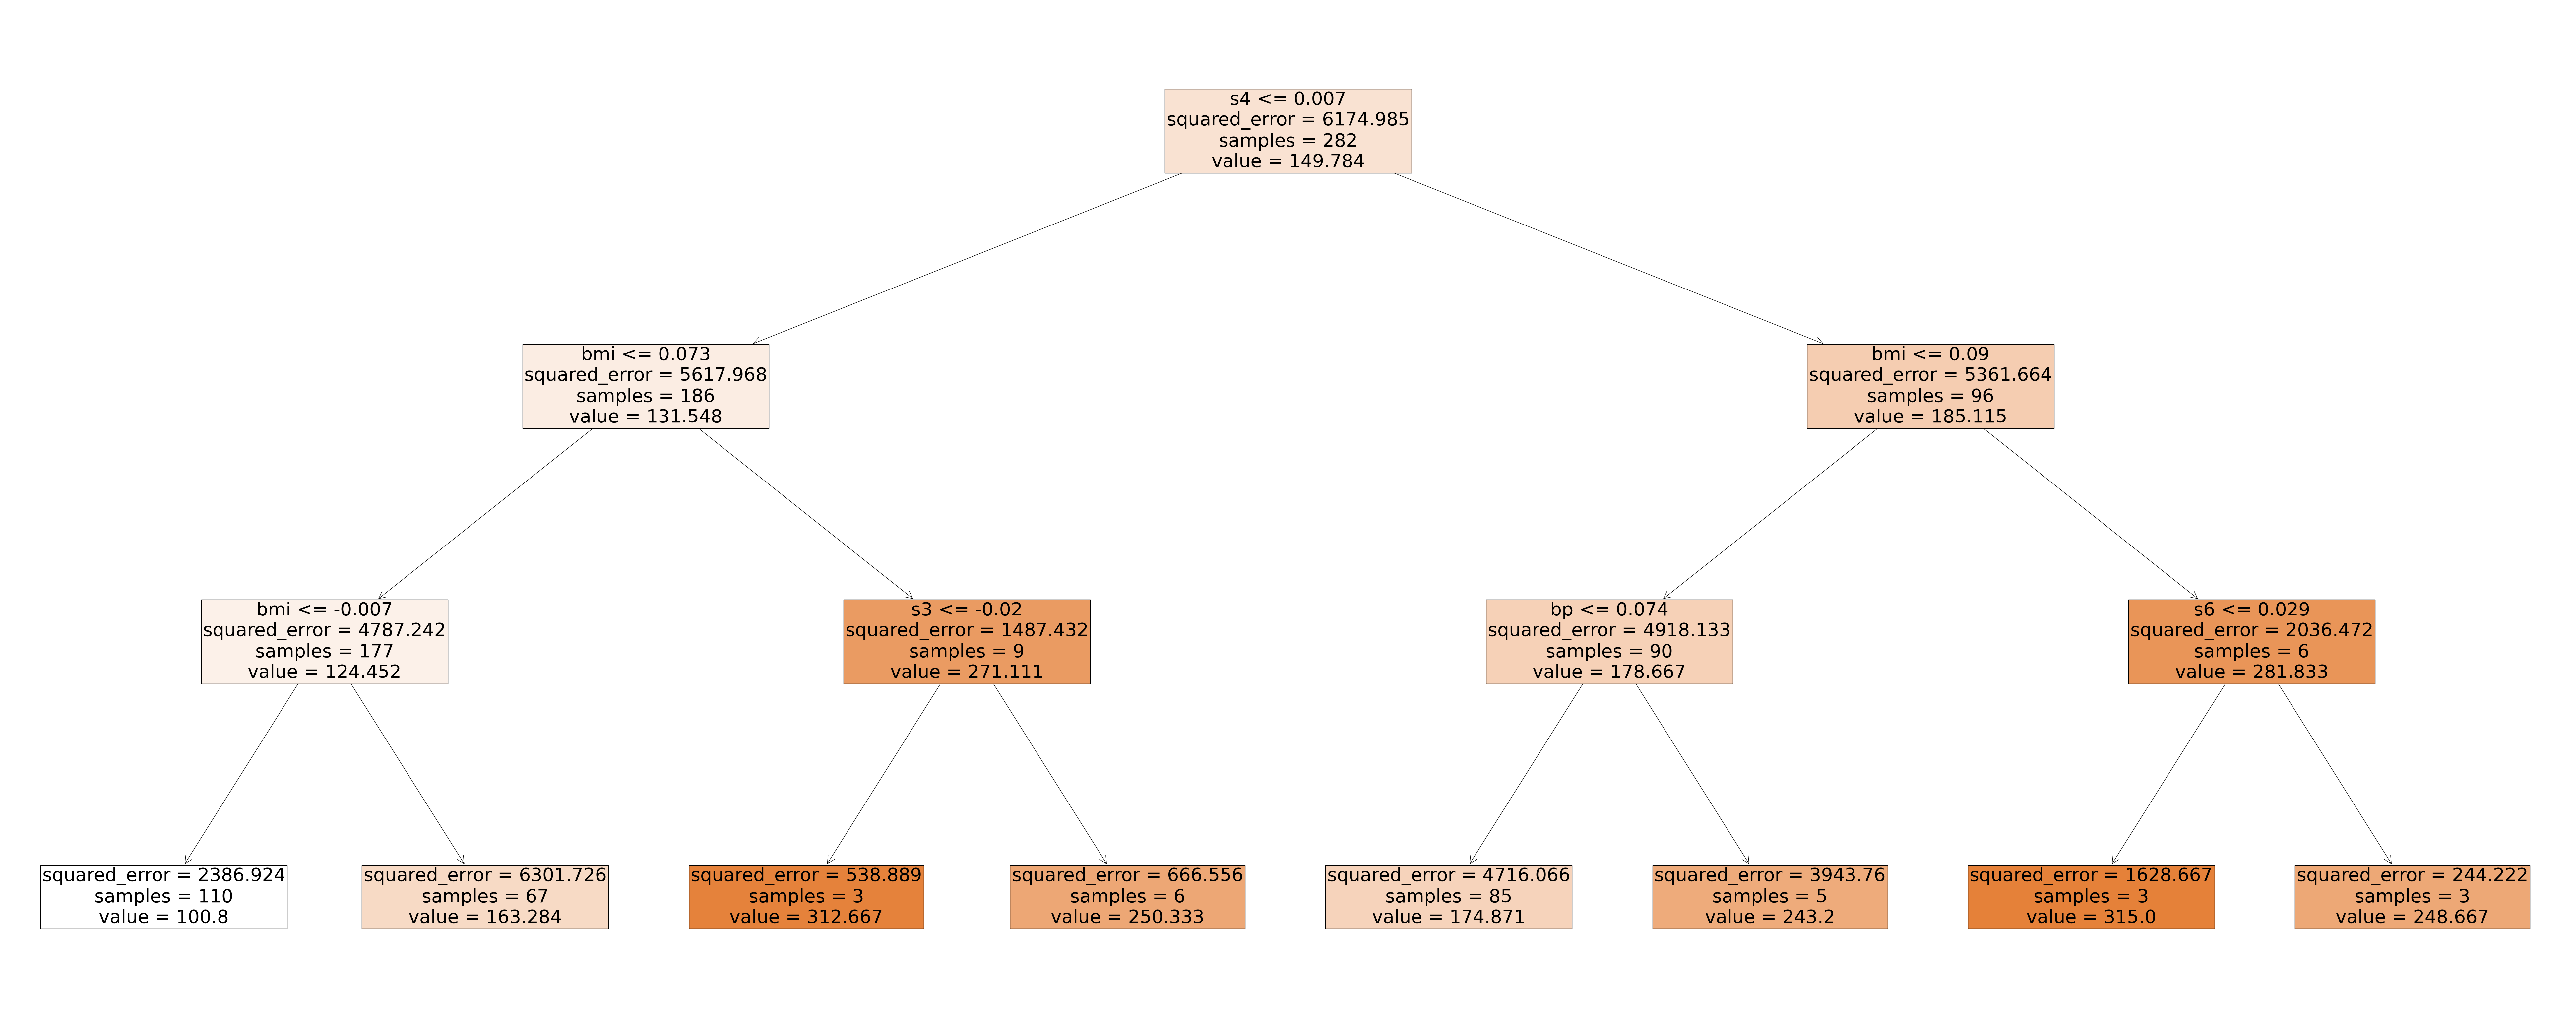

In [14]:
# Melhores parâmetros encontrados pelo GridSearchCV
print(gs.best_params_)

# Treinando o modelo com toda a base para visualizar
reg=DecisionTreeRegressor(criterion='squared_error',
                          max_depth=3,
                          min_samples_split=3,
                          random_state=10,
                          splitter='random')
reg.fit(X,y)

# Plotando a árvore
import matplotlib.pyplot as plt
from sklearn import tree

_,ax=plt.subplots(figsize=(100,40))
x=tree.plot_tree(reg, feature_names=db.feature_names,filled=True, 
                 ax=ax, fontsize=40)
